## Homework 2 Part 2 Task 1: PCA
We will use the Fashion-MNIST dataset to build a PCA model (i.e. eigenvectors and eigenvalues). <br>
https://github.com/zalandoresearch/fashion-mnist <br>
Then, we will use the PCA model to <br>
(1) visualize the data in 2D <br>
(2) generate new images as a generative model <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn

#### First, we load the dataset

In [1]:
# load the data
from sklearn.datasets import fetch_openml
import pandas as pd
fasion_mnist=fetch_openml(name="Fashion-MNIST")

In [ ]:
data=fasion_mnist.data
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [ ]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [ ]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [ ]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [ ]:
[target.min(), target.max()]

[0, 9]

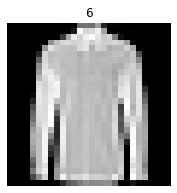

<Figure size 432x288 with 0 Axes>

In [ ]:
# show some of the images
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')    
    ax.axis('off')
    ax.set_title(target[n])
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)  

#### we need the function plot_components for visualization

In [ ]:
from matplotlib import offsetbox
import numpy as np
def plot_components(data, model, images, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Your work begins here

In [ ]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#it runs faster to get the eigenvectors and eigenvalues
#it is more memory efficient
#the function 'fit' computes eigenvectors and eigenvalues
#use 'fit_transform' to do fit and forward transform together

from sklearn.decomposition import IncrementalPCA
from scipy import sparse
pca = IncrementalPCA(n_components=2, whiten=False)  # transform/project data from 784 to 2 dimensions
X = sparse.csr_matrix(data)
Beta = pca.fit_transform(X)
Y = Beta / np.sqrt(pca.explained_variance_)
print(X.shape)
print(Y.shape)

(70000, 784)
(70000, 2)


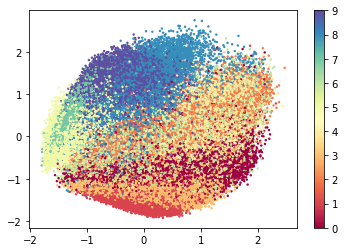

In [ ]:
#show the data points in 2D
#you can find example code in my lecture notes (notebook files)
#you need to create a figure and axis:  fig, ax = plt.suplots()

plt.scatter(Y[:, 0], Y[:, 1], c=fasion_mnist.target.astype('int64'),  edgecolor='none', s=6, cmap='Spectral')
plt.colorbar()

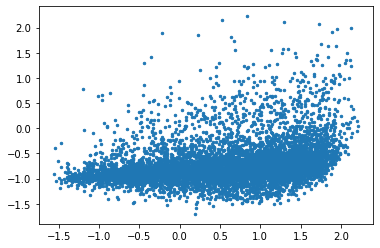

In [ ]:
#show only the data points/images with class label=0 (i.e. target is 0) in 2D
Y[target==0]
plt.scatter(Y[target==0, 0], Y[target==0, 1], s=6)


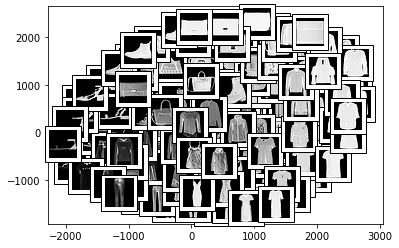

In [ ]:
# use plot_components to show the data points
# the parameter 'model' of plot_components refers to the pca model

images=data.reshape(-1,28,28)
plot_components(data, pca, images, ax=plt.gca(),
                    thumb_frac=0.05, cmap='gray')

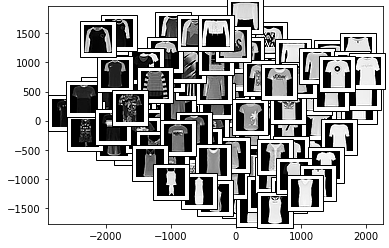

In [ ]:
# use plot_components to show the data points with class label=0
# you may need something like this: data[target==0], images[target==0]
fullData = pd.DataFrame(data)
fullData['label'] = target
fullData0 = fullData[fullData['label'] == 0]
data0 = fullData0.drop('label', axis = 1)
images0=data0.values.reshape(-1,28,28)
plot_components(data0, pca, images0, ax=plt.gca(),
                    thumb_frac=0.05, cmap='gray')

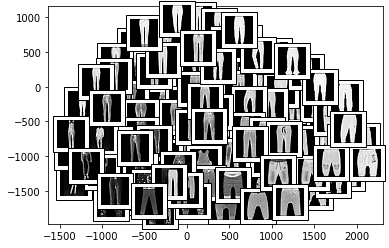

In [ ]:
# use plot_components to show the data points with class label=1
# you may need something like this: data[target==1], images[target==1]

fullData1 = fullData[fullData['label'] == 1]
data1 = fullData1.drop('label', axis = 1)
images1=data1.values.reshape(-1,28,28)
plot_components(data1, pca, images1, ax=plt.gca(),
                    thumb_frac=0.05, cmap='gray')

From the above examples, we can see that PCA can extract meaningful features from the images 

### 2. Use PCA to generate new images 

First, we need to figure out how many components we need

In [ ]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#set n_components to a large number, e.g, 100
pca100 = IncrementalPCA(n_components=100, whiten=False)
pca100

IncrementalPCA(batch_size=None, copy=True, n_components=100, whiten=False)

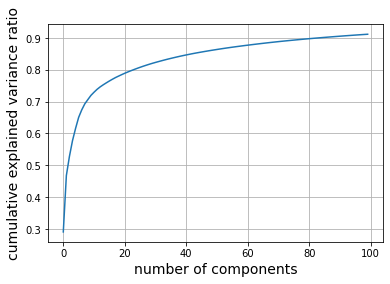

In [ ]:
#plot the curve of 'percentage of variance explained' (0~1) vs n_components (0~100)
#apply np.cumsum on explained_variance_ratio_
# use plt.grid() to show grid
pca100 = pca100.fit(X)
plt.plot(np.cumsum(pca100.explained_variance_ratio_))
plt.xlabel('number of components', fontsize=14)
plt.ylabel('cumulative explained variance ratio', fontsize=14)
plt.grid()

In [ ]:
#pca.explained_variance_ratio_
print ( "Components = ", pca100.n_components_ , ";\nTotal explained variance = ",
      round(pca100.explained_variance_ratio_.sum(),5)  )

Components =  100 ;
Total explained variance =  0.91191


In [ ]:
A = pca100.explained_variance_ratio_.cumsum()
A

array([0.2905654 , 0.46795049, 0.52812659, 0.57769023, 0.61613994,
       0.65072841, 0.67418048, 0.69322343, 0.70666276, 0.71977996,
       0.72970073, 0.738844  , 0.74648883, 0.75306322, 0.75915709,
       0.76504425, 0.77056912, 0.77583152, 0.78042673, 0.78497357,
       0.78931717, 0.79338824, 0.79723576, 0.80095898, 0.80457296,
       0.80806809, 0.81140419, 0.81458669, 0.81767356, 0.82061433,
       0.82337199, 0.82603012, 0.82866693, 0.83123109, 0.83369736,
       0.83606051, 0.83835929, 0.84060677, 0.84279785, 0.84488527,
       0.84687823, 0.84883892, 0.85078019, 0.85260645, 0.85435658,
       0.85606653, 0.8577463 , 0.85938446, 0.86099978, 0.86255012,
       0.86407792, 0.86558086, 0.86704951, 0.8684809 , 0.86986303,
       0.87123098, 0.87254119, 0.87382908, 0.87510057, 0.87635714,
       0.87756801, 0.87877073, 0.87995231, 0.88111581, 0.88227292,
       0.88339179, 0.88449869, 0.88559283, 0.88664628, 0.88769501,
       0.8887284 , 0.88973884, 0.89071306, 0.8916684 , 0.89260

This curve quantifies how much of the total, 784-dimensional variance is contained within the first  100  components.
For example, we see that with the first 24 components contain approximately 80% of the variance, while you need around 100 components to describe close to 91.1% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 100 components to retain 91.1% of the variance. 

In [ ]:
# choose n_component such that 
# (1) average reconstruction error < 20%
# (2) percentage of variance explained > 80%
# (1) and (2) are the same

# (1) and (2)

np.where(A>=0.8)[0]

array([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
A[23]

0.8009589822267938

In [ ]:
# (1) and (2) are the same
np.where(A>=0.91)[0]

array([97, 98, 99])

In [ ]:
# Compute the components and projected images
components = pca100.transform(X)
projected = pca100.inverse_transform(components)
Z = components/ np.sqrt(pca100.explained_variance_) 
Z[0,:]

array([-1.11461092e-01,  1.84086283e+00, -2.34120090e+00,  5.29964368e-01,
       -1.45352853e-03, -1.03349810e+00, -2.88816352e-01, -6.91965273e-01,
        1.34989407e-01, -1.15074918e-01, -7.15377290e-01, -3.30278954e-01,
        2.86157189e-01, -7.89734142e-01, -6.21384090e-01,  3.62247880e-01,
        7.59994329e-01,  1.28692812e+00,  1.31559740e+00,  3.07079936e+00,
       -9.61533957e-01, -1.27811935e+00,  8.54871238e-01,  2.06217524e-01,
        1.63147633e+00, -5.56372913e-01, -8.51028602e-01,  9.78074705e-01,
        9.96836025e-01, -8.21464781e-01, -8.29412954e-01,  2.91419371e+00,
        5.80280522e-01, -6.77943927e-01, -3.05146806e-01, -5.35464934e-01,
       -5.50982001e-01, -1.36654091e+00,  3.03053954e-01,  1.38642629e+00,
       -6.57371350e-01,  7.71810189e-01,  8.68773682e-01, -1.17144170e+00,
       -1.27596726e+00, -1.72591908e+00,  1.63654813e+00,  4.78971194e-01,
        8.13244210e-01,  1.41034640e-01,  1.08653235e+00, -4.09598306e-01,
        6.81698321e-01,  

In [ ]:
# get the mean, eigenvalues, and eigenvectors from the above pca model
# assume the name of mean is mu
# the name of eigenvalues is v (a 1D array)
# the name of eigenvectors is w (a 2D array)


In [ ]:
mu = pca100.mean_
mu

array([7.71428571e-04, 6.41428571e-03, 3.44857143e-02, 9.88857143e-02,
       2.47842857e-01, 4.08714286e-01, 8.02900000e-01, 2.20438571e+00,
       5.63490000e+00, 1.44100000e+01, 3.29068571e+01, 4.58169714e+01,
       5.20562286e+01, 5.07853143e+01, 5.04461714e+01, 5.37923429e+01,
       5.14235857e+01, 4.05507429e+01, 2.60359571e+01, 1.03548286e+01,
       4.07085714e+00, 1.94085714e+00, 1.16301429e+00, 8.44214286e-01,
       4.71400000e-01, 2.56100000e-01, 9.26428571e-02, 1.81285714e-02,
       7.01428571e-03, 2.48000000e-02, 1.06685714e-01, 3.54671429e-01,
       7.66971429e-01, 2.07485714e+00, 7.26434286e+00, 1.73702000e+01,
       3.19401286e+01, 5.29159571e+01, 7.96850857e+01, 1.00216229e+02,
       1.13055186e+02, 1.11231129e+02, 1.09131557e+02, 1.14742400e+02,
       1.10488757e+02, 9.10748429e+01, 7.16686000e+01, 4.50350000e+01,
       2.59938143e+01, 1.35525143e+01, 6.19580000e+00, 3.48902857e+00,
       2.21898571e+00, 1.18970000e+00, 4.54485714e-01, 7.99285714e-02,
      

In [ ]:
w=pca100.get_covariance()
w

In [ ]:
w.shape

(784, 784)

In [ ]:
from numpy.linalg import eig
v = eig(w) 

In [ ]:
print(v)

In [ ]:
pca100.components_

array([[ 2.04906173e-07,  3.32408941e-06,  1.97575092e-05, ...,
         1.08714843e-03,  1.07460384e-04,  1.16598033e-05],
       [-8.68723235e-08,  4.30971527e-06,  1.30201441e-05, ...,
         2.41365831e-03,  7.44205947e-04,  6.97630881e-05],
       [ 4.28565955e-07, -1.03155103e-06,  1.05545564e-05, ...,
        -4.93566916e-04, -9.00977481e-04, -6.83966548e-05],
       ...,
       [ 4.64114123e-07,  2.01865147e-05,  2.39756789e-04, ...,
         1.21829481e-03,  2.14591982e-03,  1.30989724e-04],
       [-6.97781451e-07,  8.53087468e-05,  5.28225569e-04, ...,
         1.45040553e-02,  5.81004089e-03,  3.01047871e-04],
       [-8.62434155e-06,  9.28632964e-05,  3.63413658e-04, ...,
         1.25568313e-02, -2.16352282e-03, -1.55980352e-04]])

In [ ]:
pca100.explained_variance_

array([1288114.05076212,  786371.07151052,  266768.43018538,
        219722.06172979,  170452.55290969,  153335.154014  ,
        103966.03671193,   84419.89034828,   59578.28220537,
         58150.22665575,   43980.06145279,   40533.29656765,
         33890.55652739,   29145.12659636,   27014.91093397,
         26098.53437267,   24492.44225256,   23328.90311934,
         20371.15017706,   20156.77349475,   19255.71679771,
         18047.59969635,   17056.52033933,   16505.54421754,
         16021.22663083,   15494.34834353,   14789.36361804,
         14108.4606296 ,   13684.48164971,   13036.81811119,
         12225.05375379,   11783.83597447,   11689.32091352,
         11367.25142881,   10933.32425938,   10476.1393919 ,
         10190.78070739,    9963.36788819,    9713.3624917 ,
          9253.77167018,    8835.0735217 ,    8691.98256924,
          8605.89587796,    8096.05882169,    7758.54351618,
          7580.45048546,    7446.60017487,    7262.19533554,
          7160.90412289,

In [ ]:
pca100.singular_values_

array([300277.69720593, 234617.11070309, 136651.10078059, 124017.43667333,
       109231.4435093 , 103601.67684852,  85308.37358547,  76872.02289838,
        64578.79045084,  63800.13883743,  55484.77558425,  53266.22031305,
        48706.31444034,  45167.79512682,  43485.82240762,  42741.9151133 ,
        41405.8747672 ,  40410.39333452,  37761.88741634,  37562.66747529,
        36713.49779199,  35543.12776255,  34553.42772045,  33990.75741556,
        33488.35384027,  32933.09717745,  32175.15600428,  31425.75592744,
        30949.96011303,  30208.67807378,  29253.0603136 ,  28720.31919003,
        28604.90822613,  28208.08807355,  27664.4494764 ,  27079.86856124,
        26708.50910733,  26408.82028425,  26075.38419767,  25451.02676005,
        24868.58080883,  24666.37565319,  24543.92196779,  23805.7980639 ,
        23304.29762059,  23035.27628512,  22831.00010164,  22546.53878741,
        22388.75002536,  21933.90044629,  21773.74552221,  21595.97442885,
        21348.12574827,  

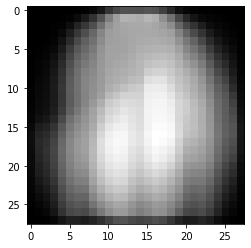

In [ ]:
# plot the mean image from pca
# you need to reshape it to 28x28
plt.imshow(mu.reshape(28,28), cmap='gray')

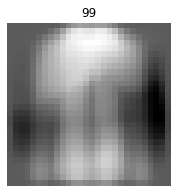

<Figure size 432x288 with 0 Axes>

In [ ]:
# use a for loop to show the images of eigenvectors
# image is w[n].reshape(28,28)
# sample code:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, 100):
  ax.imshow(w[n].reshape(28,28), cmap='gray')    
  ax.axis('off')
  ax.set_title(n)
  plt.draw()
  display.clear_output(wait=True)
  display.display(fig)
  plt.pause(0.2) 

In [ ]:
# L2 norm of an eigenvector w[0]
np.sum(w[0]**2)

767.9608198831535

In [ ]:
# generate a random number
3*np.random.randn()

4.1067256393792855

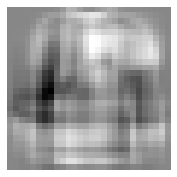

<Figure size 432x288 with 0 Axes>

In [ ]:
# generate and show the new images
# use a for loop to generate 100 new images
# inside the for loop
#     x_new = mu + y[0]*sqrt(v[0])*w[0]+...+y[K]*sqrt(v[K])*w[K]
#     use a for loop to get X_new using the above equation
#     K is the number of components
#     y[k] is a random number generated using 3*np.random.randn()

# use all of the 100 components
K=pca100.components_ * np.sqrt(pca100.explained_variance_.reshape(100,1))
# generate some new face images
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, 100):
    y = 3*np.random.randn(100,1)
    temp = K*y
    temp = temp.sum(axis=0)
    x_new = mu + temp
    x_new = x_new.reshape(28,28)  
    ax.imshow(x_new, cmap='gray')    
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2) 


PCA is not good at generating images. <br>
There is a better method based on neural networks.

### t-SNE for visualization

In [ ]:
#select a subset of data points for TSNE
#because TSNE is very time-consuming
data_s=data[0::100]
target_s=target[0::100]
images_s=images[0::100]

In [ ]:
# run t-SNE on data_s and visualize the data in 2D
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_s)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 700 samples in 0.056s...
[t-SNE] Computed neighbors for 700 samples in 0.868s...
[t-SNE] Computed conditional probabilities for sample 700 / 700
[t-SNE] Mean sigma: 592.799081
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.523193
[t-SNE] KL divergence after 300 iterations: 0.604361


[Text(0.5, 1.0, 'Data T-SNE projection')]

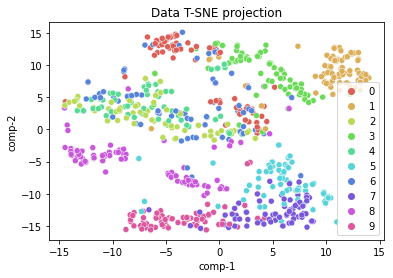

In [ ]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  
df = pd.DataFrame()
df["y"] = target_s
df["comp-1"] = tsne_results[:,0]
df["comp-2"] = tsne_results[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="Data T-SNE projection")